In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df = df.rename(columns={'v1':'labels','v2':'texts'})
df.head()

,labels,texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [21]:
df['label_count'] = df['labels'].map({'ham':0,'spam':1})
df.label_count.head()

0    0
1    0
2    1
3    0
4    0
Name: label_count, dtype: int64

In [22]:
train_x,test_x,train_y,test_y = train_test_split(df['texts'],df['label_count'],test_size=.2)
train_x.shape, test_y.shape 

((4457,), (1115,))

In [23]:
vect = CountVectorizer()
vect.fit(train_x)
train_x_df = vect.transform(train_x)
test_x_df = vect.transform(test_x)

In [24]:
model = MNB()
model.fit(train_x_df,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
predicted= model.predict(test_x_df)

In [26]:
model.score(test_x_df,test_y)

0.9910313901345291

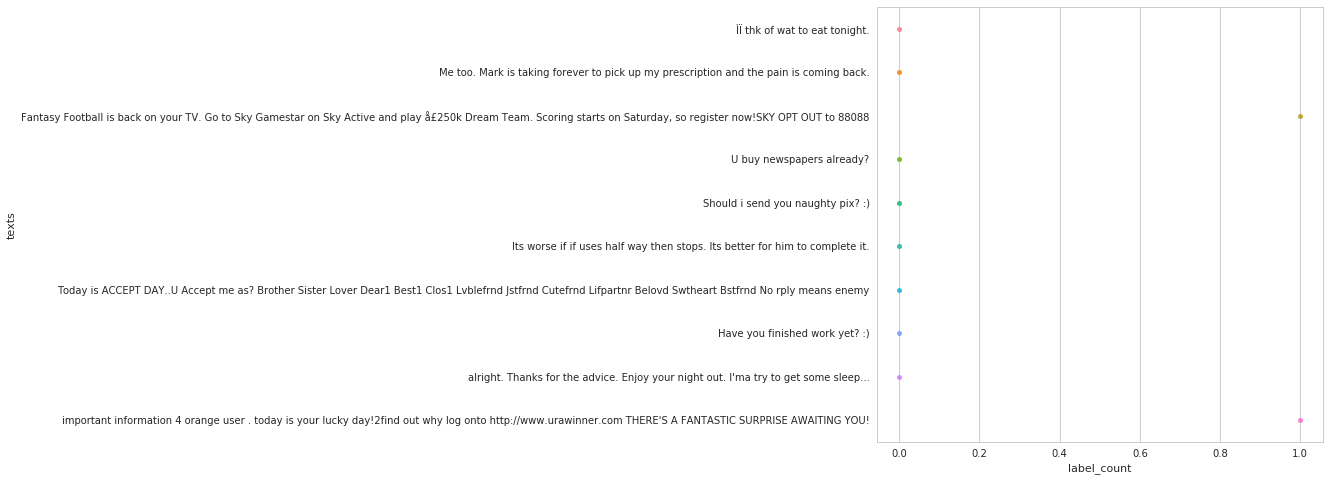

In [104]:
# sn.set_context("paper", rc={"font_scale":1.9, "axes.titlesize":18, "axes.labelsize":20})   

fig, ax = plt.subplots()
sn.set_context("talk", font_scale=0.9) 
fig.set_size_inches(8.0, 8.0)

sn.set(style="whitegrid", color_codes=True)
sn.stripplot(y=test_x[:10], x=test_y[:10], ax=ax)

In [ ]:
sn.stripplot(y=test_x[:10], x=df[''][:10], jitter=True);